<a href="https://colab.research.google.com/github/mokranerachedi/loan-approval-prediction/blob/main/loan_approval_prediction_EN_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Approval Prediction**

Prediction of Loan Approval using Machine Learning.

## **Import packages**

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Load the data**

In [187]:
df = pd.read_csv('/content/train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## **Exploratory Data Analysis (EDA)**

In [188]:
# Shape of the dataframe
print(df.shape)
print("Number of lines :", df.shape[0])
print("Number of columns :", df.shape[1])

(614, 13)
Number of lines : 614
Number of columns : 13


In [189]:
# List of columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [190]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [191]:
# Data types
df.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [192]:
# Statistical description of the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [193]:
# Number of missing values of each variable in the dataframe
df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [194]:
# Total number of missing values
print("Total number of missing values :", (df.isna().sum()).sum())

Total number of missing values : 149


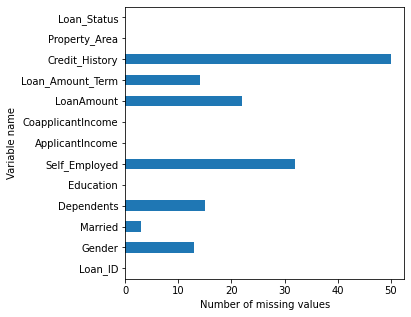

In [195]:
# Visualize the missing values
plt.figure(figsize=(5, 5))
df.isna().sum().plot(kind="barh")
plt.ylabel("Variable name")
plt.xlabel("Number of missing values")
plt.show()

In [196]:
# Analysis of the target variable 'Loan_Status'
df['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

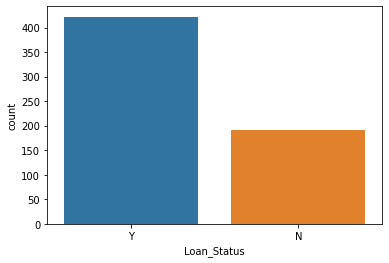

In [197]:
# Visualization of the target variable 'Loan_Status' with a bar chart
sns.countplot(x='Loan_Status', data=df)
plt.show()

**Analysis of the target variable :**

- **68.73%** of credit applications were approved.

- **31.27%** of credit applications were refused.

In [198]:
# Analysis of categorical variables

# Gender
print("# Gender")
print(df['Gender'].value_counts(normalize=True)*100)
print("-"*35)

# Married
print("# Married")
print(df['Married'].value_counts(normalize=True)*100)
print("-"*35)

# Education
print("# Education")
print(df['Education'].value_counts(normalize=True)*100)
print("-"*35)

# Self_Employed
print("# Self_Employed")
print(df['Self_Employed'].value_counts(normalize=True)*100)
print("-"*35)

# Gender
Male      81.364393
Female    18.635607
Name: Gender, dtype: float64
-----------------------------------
# Married
Yes    65.139116
No     34.860884
Name: Married, dtype: float64
-----------------------------------
# Education
Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64
-----------------------------------
# Self_Employed
No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64
-----------------------------------


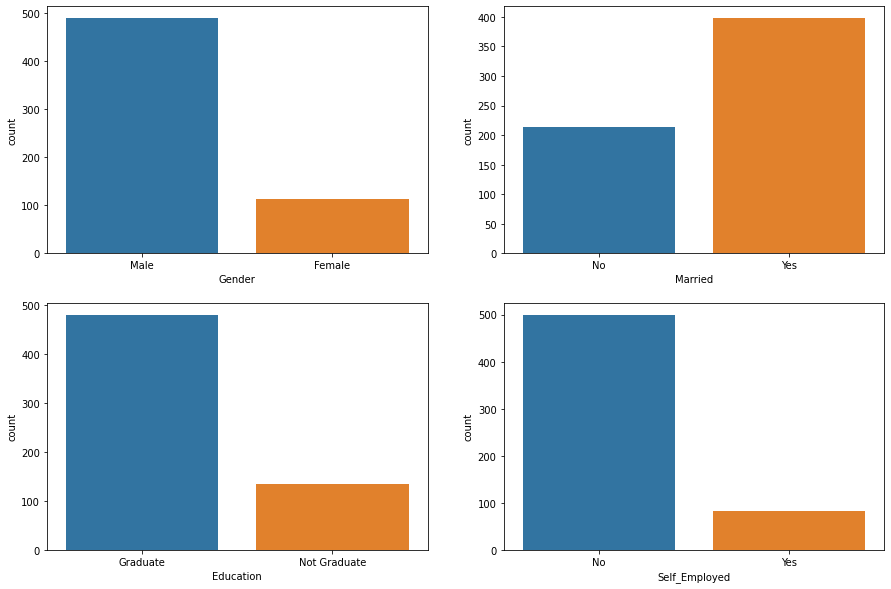

In [199]:
plt.figure(figsize=(15, 10))

# Gender 
plt.subplot(2, 2, 1)
sns.countplot(x = 'Gender', data = df)

# Married
plt.subplot(2, 2, 2)
sns.countplot(x = 'Married', data = df)

# Education
plt.subplot(2, 2, 3)
sns.countplot(x = 'Education', data = df)

# Self_Employed
plt.subplot(2, 2, 4)
sns.countplot(x = 'Self_Employed', data = df)

plt.show()

**Analysis of categorical variables:** 
- The majority of credit applicants are men (over 81%).
- Most credit applicants are married (over 65%).
- More than 78% of credit applicants are graduated.
- Only 14% of credit applicants are self-employed.

In [200]:
# Analysis of ordinal variables

# Dependents
print("# Dependents")
print(df['Dependents'].value_counts(normalize=True)*100)
print("-"*35)

# Self_Employed
print("# Property_Area")
print(df['Property_Area'].value_counts(normalize=True)*100)
print("-"*35)

# Dependents
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64
-----------------------------------
# Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64
-----------------------------------


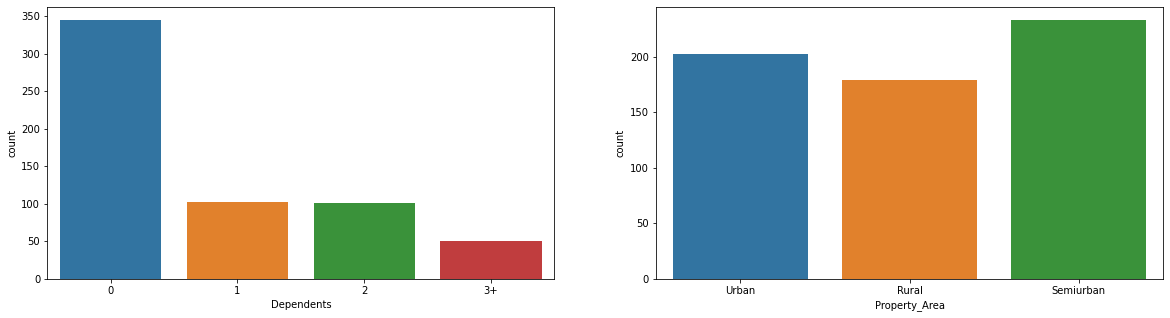

In [201]:
plt.figure(figsize=(20, 5))

# Dependents 
plt.subplot(1, 2, 1)
sns.countplot(x = 'Dependents', data = df)

# Property_Area
plt.subplot(1, 2, 2)
sns.countplot(x = 'Property_Area', data = df)

plt.show()

**Analysis of ordinal variables :** 

- The majority of credit applicants have no dependents (over 57%).
- The **semi-urban** area is the area with the most credit applicants.

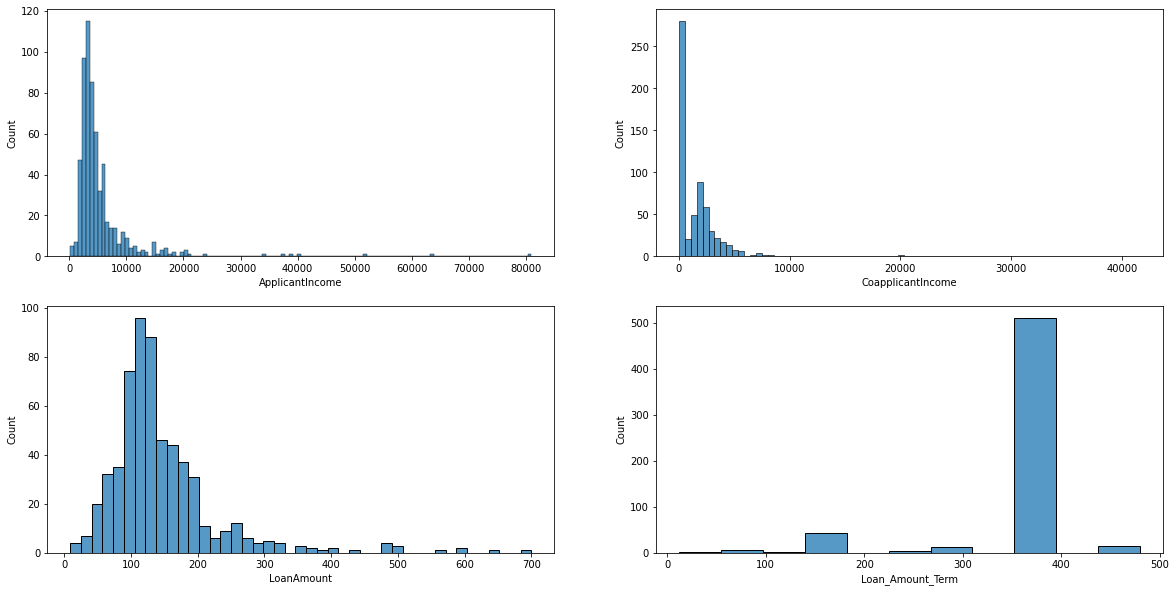

In [202]:
# Analysis of numerical variables
plt.figure(figsize=(20, 10))

# ApplicantIncome
plt.subplot(2, 2, 1)
sns.histplot(x = 'ApplicantIncome', data = df)

# CoapplicantIncome
plt.subplot(2, 2, 2)
sns.histplot(x = 'CoapplicantIncome', data = df)

# LoanAmount
plt.subplot(2, 2, 3)
sns.histplot(x ='LoanAmount', data = df)

# Loan_Amount_Term
plt.subplot(2, 2, 4)
sns.histplot(x ='Loan_Amount_Term', data = df)

plt.show()

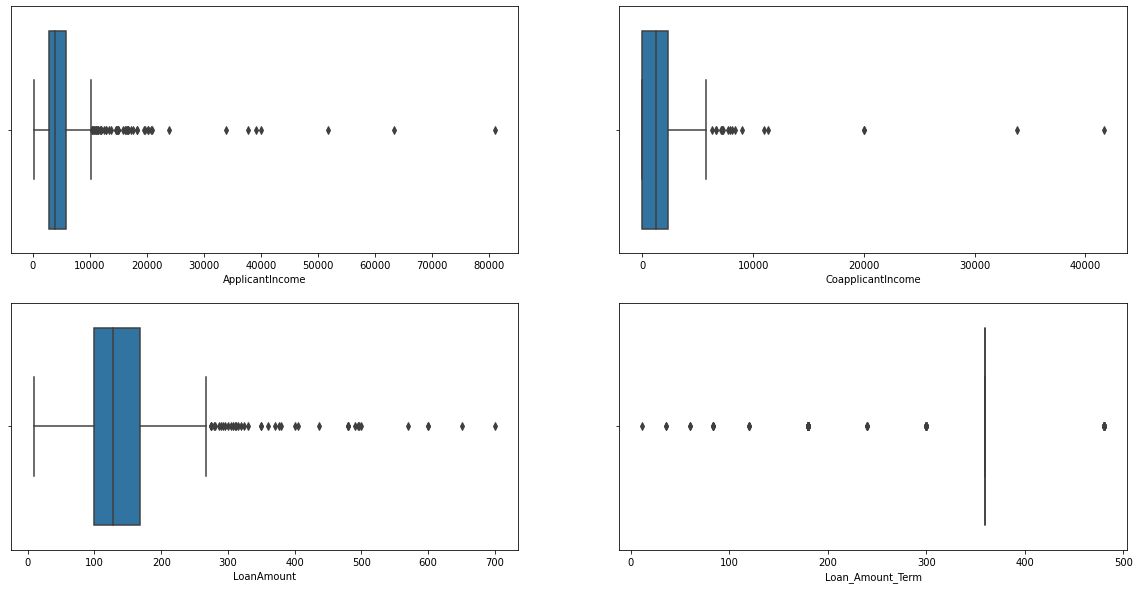

In [203]:
plt.figure(figsize=(20, 10))

# ApplicantIncome
plt.subplot(2, 2, 1)
sns.boxplot(x = 'ApplicantIncome', data = df)

# CoapplicantIncome
plt.subplot(2, 2, 2)
sns.boxplot(x = 'CoapplicantIncome', data = df)

# LoanAmount
plt.subplot(2, 2, 3)
sns.boxplot(x ='LoanAmount', data = df)

# Loan_Amount_Term
plt.subplot(2, 2, 4)
sns.boxplot(x ='Loan_Amount_Term', data = df)

plt.show()

**Analysis of numerical variables :**

- The income of applicants generally varies between 0 and 10,000.
- The amount of credit requested is much more between 0 and 200.
- We observe that the variables **ApplicantIncome**, **CoapplicantIncome** and **LoanAmount** contain outliers.

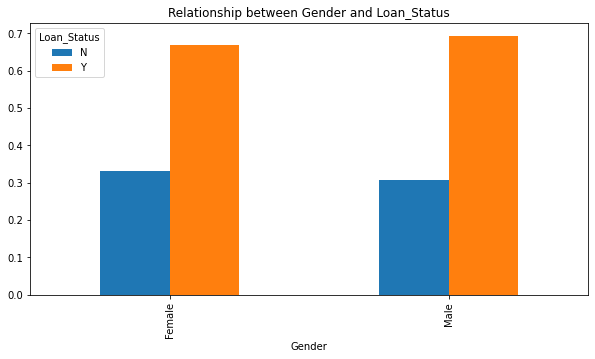

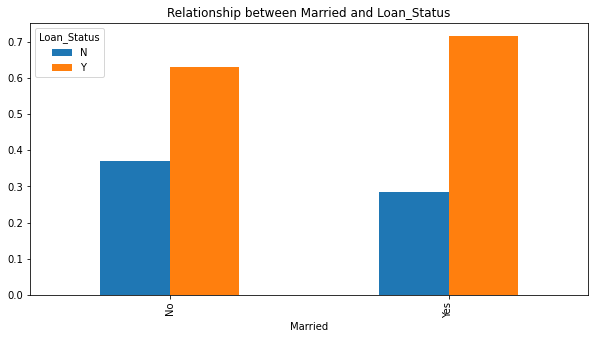

In [204]:
# Relationship between the independent variables and the target variable

# Gendre / Loan_Status
Gender=pd.crosstab(df['Gender'], df['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="Relationship between Gender and Loan_Status") 
plt.show()

# Married / Loan_Status
Married=pd.crosstab(df['Married'], df['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="Relationship between Married and Loan_Status") 
plt.show()

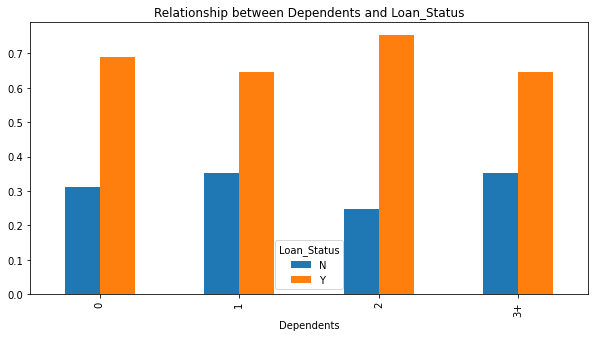

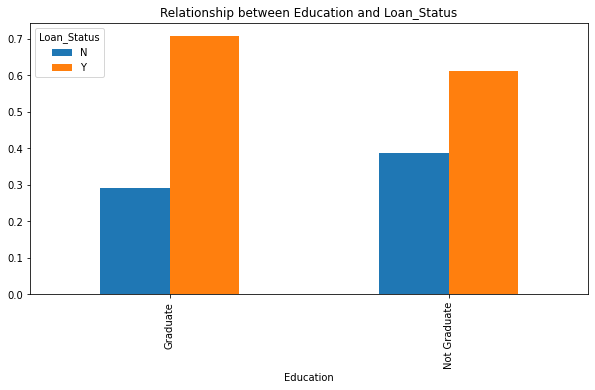

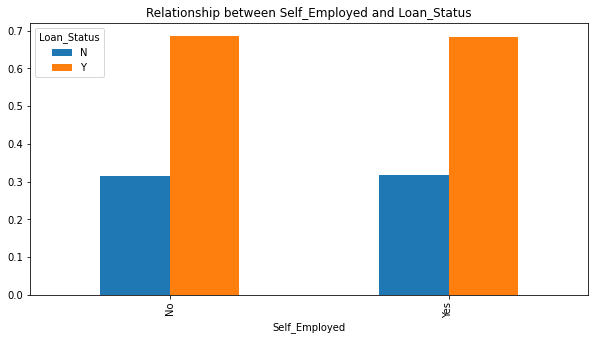

In [205]:
# Dependents / Loan_Status
Dependents=pd.crosstab(df['Dependents'], df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="Relationship between Dependents and Loan_Status") 
plt.show()

# Education / Loan_Status
Education=pd.crosstab(df['Education'], df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="Relationship between Education and Loan_Status") 
plt.show()

# Self_Employed / Loan_Status
Self_Employed=pd.crosstab(df['Self_Employed'], df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="Relationship between Self_Employed and Loan_Status") 
plt.show()

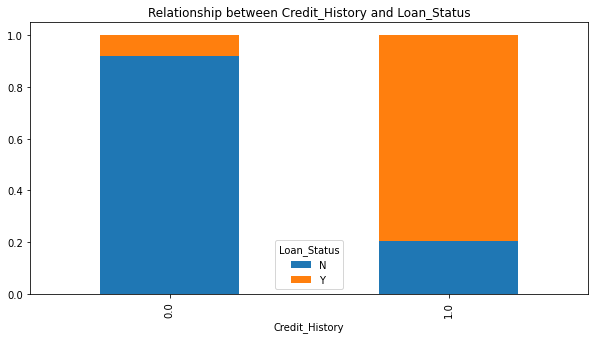

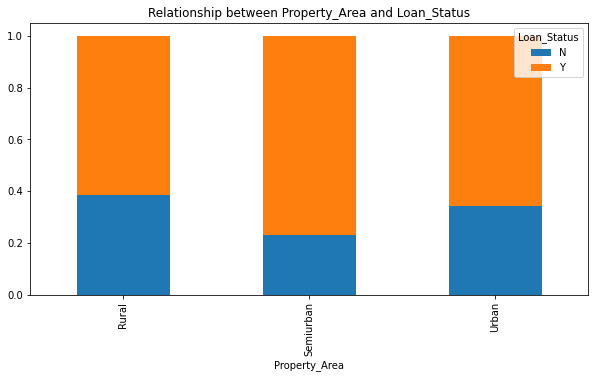

In [206]:
# Credit_History / Loan_Status
Credit_History=pd.crosstab(df['Credit_History'], df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5), title="Relationship between Credit_History and Loan_Status") 
plt.show()

# Property_Area / Loan_Status
Property_Area=pd.crosstab(df['Property_Area'], df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5), title="Relationship between Property_Area and Loan_Status") 
plt.show()

**Relationship between the independent variables and the target variable :**

- There is not really relationship between loan approval and the gender of the applicant.
- Married people are the most accepted applicants.
- Applicants with 2 dependents are the most accepted.
- There is not really a relationship between the approval of the credit application and whether an applicant is self-employed or not.
- Applications from graduates are the most approved.
- People with an existing credit history are more likely to have their credit applications approved.
- Applications from people living in rural areas are the most approved.

## **Data preprocessing**

For this step we will perform the following tasks :

- Process the missing values
- Encode the data
- Normalise the data

In [207]:
# Creating a copy of the dataset
df1 = df.copy()

# Delete Loan_ID from the dataset
df1.drop(['Loan_ID'], axis = 1, inplace = True)

### **Dealing with missing values**

In [208]:
# See missing values
df1.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [209]:
# Replace missing values with :

# Married ------------> mode
# Gender -------------> mode
# Dependents ---------> mode
# Self_Employed ------> mode
# Credit_History -----> mode
# LoanAmount ---------> median
# Loan_Amount_Term ---> median

def imputation(data):
    """
    Allows to process and replace missing values for each variable in a dataframe.
    
    data: a dataframe
    """
    data["Married"].fillna(data["Married"].mode()[0], inplace=True)
    data["Gender"].fillna(data["Gender"].mode()[0], inplace=True)
    data["Dependents"].fillna(data["Dependents"].mode()[0], inplace=True)
    data["Self_Employed"].fillna(data["Self_Employed"].mode()[0], inplace=True)
    data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
    data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
    data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

imputation(df1)

In [210]:
# Number of missing values after processing
df1.isna().sum().sort_values(ascending=False)

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
dtype: int64

### **Encoding data**

In [211]:
# Encoding data with the get_dummies() function

def encodage(data):
    """
    Function to encode data in a dataframe
    
    data: un dataframe
    """
    
    return pd.get_dummies(data, drop_first=True)
    
df1 = encodage(df1)
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


### **Normalising data**

In [212]:
# First, we separate the target variable from the features 
y = df1['Loan_Status_Y']
X = df1.drop('Loan_Status_Y', axis = 1)

In [213]:
from sklearn.preprocessing import StandardScaler

# Data standardisation
X = StandardScaler().fit(X).transform(X)

## **Modelling**

In [214]:
# Importing packages for modelling
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

### **Data partitioning**

- **80%** : Training data

- **20%** : Test data

In [215]:
# Split the data into training and test data with the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [216]:
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print('-'*35)
print("X_test  : ", X_test.shape)
print("y_test  : ", y_test.shape)

X_train :  (491, 14)
y_train :  (491,)
-----------------------------------
X_test  :  (123, 14)
y_test  :  (123,)


### **Evaluation procedure**

In [217]:
# Scores will contain the different scores obtained by our models
scores = {}

In [218]:
def evaluation(model, name_in_scores):
    """
    Function that allows to evaluate a model
    
    model: a machine learning model
    name_in_scores: the name of the model in the scores dictionary
    """
    print('')
    print('')
    print(model)
    print('')
    print('')
    print('-'*60)
    print('')
    
    # See if our model is overfitting or underfitting
    print("Learning Curves")
    print('')
    N, train_score, val_score = learning_curve(model, 
                                               X_train, 
                                               y_train, 
                                               scoring = 'accuracy',
                                               train_sizes= np.linspace(0.1, 1.0, 5),
                                               cv = 5
                                               )

    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()
    print('-'*60)
    print('')
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # The confusion matrix
    print("Confusion matrix")
    print('')
    
    # Calculation of the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred_test)
    
    # Visualize the matrix
    sns.heatmap(cf_matrix, 
                annot=True,
                xticklabels = ['False','True'],
                yticklabels = ['False','True'])
    plt.xlabel("Predicted Classes")
    plt.ylabel("Real Classes")
    plt.show()
    
    print('-'*60)
    print('')
    
    # The classification report
    print("The classification report")
    print('')
    print(classification_report(y_test, y_pred_test))
    print('-'*60)
    print('')
    

    
    print("Train set accuracy score : ", accuracy_score(y_train, y_pred_train))
    print("Train set f1 score : ", f1_score(y_train, y_pred_train))
    print("Test set accuracy score : ", accuracy_score(y_test, y_pred_test))
    print("Test set f1 score : ", f1_score(y_test, y_pred_test))
    print('')
    print('')
    print('-'*60)
    print('')
    print('')

    scores[name_in_scores] = [
        np.around(accuracy_score(y_test, y_pred_test), 4) * 100,
        np.around(precision_score(y_test, y_pred_test), 4) * 100,
        np.around(recall_score(y_test, y_pred_test), 4) * 100,
        np.around(f1_score(y_test, y_pred_test), 4) * 100
    ]

## **Implementation of models**

### **K-Nearest Neighbors**



KNeighborsClassifier(metric='euclidean', n_neighbors=9)


------------------------------------------------------------

Learning Curves



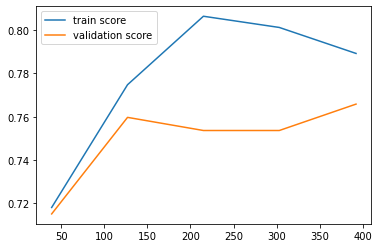

------------------------------------------------------------

Confusion matrix



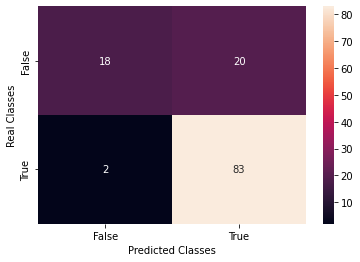

------------------------------------------------------------

The classification report

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123

------------------------------------------------------------

Train set accuracy score :  0.7881873727087576
Train set f1 score :  0.8635170603674541
Test set accuracy score :  0.8211382113821138
Test set f1 score :  0.8829787234042553


------------------------------------------------------------




In [219]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_hyp = {
    'n_neighbors': np.arange(1, 10),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

knn_grid = GridSearchCV(knn, knn_hyp, scoring = "accuracy", cv = 5)

knn_grid.fit(X_train, y_train)

knn_model = knn_grid.best_estimator_

evaluation(knn_model, "K-Nearest Neighbors")

### **Random Forest**



RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)


------------------------------------------------------------

Learning Curves



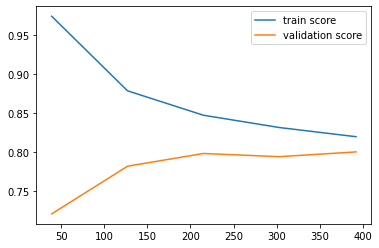

------------------------------------------------------------

Confusion matrix



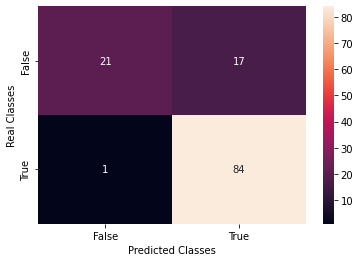

------------------------------------------------------------

The classification report

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

------------------------------------------------------------

Train set accuracy score :  0.814663951120163
Train set f1 score :  0.8804204993429698
Test set accuracy score :  0.8536585365853658
Test set f1 score :  0.903225806451613


------------------------------------------------------------




In [220]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

rf_hyp = {
    'n_estimators':[5, 10, 20, 50, 100, 200],
    'max_depth':[None, 2, 5, 10, 15, 20]
}

rf_grid = GridSearchCV(rf, rf_hyp, scoring = "accuracy", cv = 5)

rf_grid.fit(X_train, y_train)

rf_model = rf_grid.best_estimator_

evaluation(rf_model, "Random Forest")

### **Logistic Regression**



LogisticRegression(C=0.1, random_state=42)


------------------------------------------------------------

Learning Curves



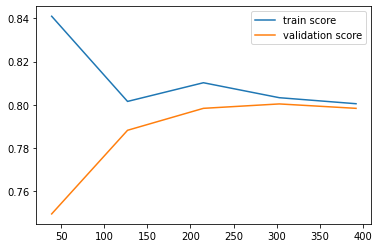

------------------------------------------------------------

Confusion matrix



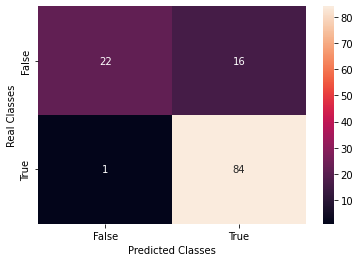

------------------------------------------------------------

The classification report

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

------------------------------------------------------------

Train set accuracy score :  0.8004073319755601
Train set f1 score :  0.8710526315789474
Test set accuracy score :  0.8617886178861789
Test set f1 score :  0.9081081081081082


------------------------------------------------------------




In [221]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(random_state = 42)

lr_hyp = {
    'C':[0.001, 0.01, 0.1, 1, 10]
}

lr_grid = GridSearchCV(lr, lr_hyp, scoring = "accuracy", cv = 5)

lr_grid.fit(X_train, y_train)

lr_model = lr_grid.best_estimator_

evaluation(lr_model, "Logistic Regression")

## **Results**

In [222]:
df_scores = pd.DataFrame(scores.values(), index=scores.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_scores

,Accuracy,Precision,Recall,F1-Score
K-Nearest Neighbors,82.11,80.58,97.65,88.30
Random Forest,85.37,83.17,98.82,90.32
Logistic Regression,86.18,84.00,98.82,90.81


## **Conclusion**

The comparative results indicate that Model 3 using logistic regression gives better estimates compared to the other two models. In sum, we conclude that this model can provide a fast and reliable approach to decision making that can be an alternative to the current procedures adopted by banks to process an applicant's loan approval.